<a href="https://colab.research.google.com/github/ralphcajipe/Deep-Learning-with-Python/blob/main/Boston_Housing_predicting_house_prices_a_regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting house prices: a regression example
Problem: To predict the median price of homes in a given Boston suburb in the mid 1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on.

### The Boston housing price dataset
- Few data points: 506 data points, split between 404 training samples and 102 test samples.
- Each <em>feature</em> in the input data (for example, the crime rate) has a different scale.
- For instance, some values are proportions, which take values between 0 and 1, others take calues between 1 and 12, others between 0 and 100, and so on.

**Loading the Boston housing dataset**

In [16]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data())

Look at the data

In [17]:
train_data.shape

(404, 13)

In [18]:
test_data.shape

(102, 13)

We have 404 training samples and 102 test samples, each with 13 numerical features, such as per capita crime rate, average number of rooms per dwelling, accessibility to highways, and so on.


> The targets are the median values of owner-occupied homes, in thousands of dollars.




The *median* is the **middle number** of the data set. It is exactly like it sounds. To figure out the median you put all the numbers in order (highest to lowest or lowest to highest) and then pick the middle number.

In [19]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data
**Normalizing the data**

In [20]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model
**Model definition**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    """
    Because we need to instantiate
    the same model multiple times,
    we use a function `build_model` 
    to construct it.
    """
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation
**K-fold validation**

In [22]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    # Prepares the validation data: data from partition #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # Builds the Keras model (already compiled)
    model = build_model()

    # Trains the model (in silent mode, verbose = 0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    
    # Evaluates the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [23]:
all_scores

[1.8762623071670532, 2.3160529136657715, 2.3611319065093994, 2.502347469329834]

In [24]:
np.mean(all_scores)

2.2639486491680145

**Saving the validation logs at each fold**

In [25]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    # Prepares the validation data: data from partition #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepares the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    # Builds the model (already compiled)
    model = build_model()

    # Trains the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


We can then compute the average of the per-epoch MAE scores for all folds. 

**Building the history of successive mean K-fold validation scores**

In [26]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

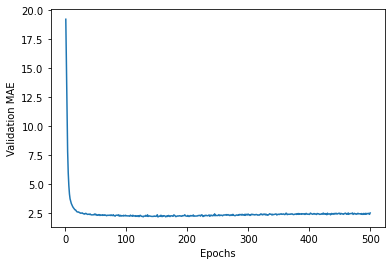

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

It may be difficult to read the plot, due to a scaling issue: the validation MAE for the first few epochs is dramatically higher than the values that follow. Let's omit the first 10 data points, which are on a different scale than the rest of the curve.

**Plotting validation scores, excluding the first 10 data points**

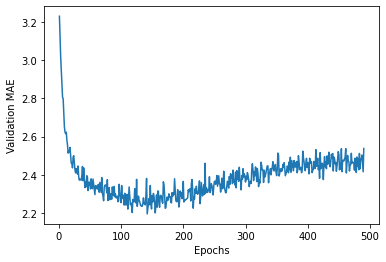

In [28]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

The validation MAE stops imporving significantly after 120-140 epochs (this number includes the 1- epochs we ommitted). Past that point, we start overfitting.

**Training the final model**

In [29]:
# Gets a fresh, compiled model
model = build_model()

# Trains it on the entirety of the data
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 13.4309 - mae: 2.5243


Here's the final result:

In [30]:
test_mae_score

2.524310350418091

### Generating predictions on new data

Remember that we only have 102 test samples, that is from index 0 to 101 when accessing on a list.

In [35]:
predictions = model.predict(test_data)

# 🏠First house at index 0
predictions[0]

array([10.047712], dtype=float32)

The first house in the test set is predicted to have a price of about $10,000.

In [38]:
# 🏠Last house at index 101
predictions[101]

array([20.505522], dtype=float32)

The last house in the test set is predicted to have a price of about $20,500.

### Wrapping Up

### Summary

###